# 卒業研究3：シミュレーションから学習データを作成し，実験データをテストデータとして用いたモデル

## 20S1066 坂西和也

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# データの読み込み
import os
# カレントディレクトリを取得
data_path = os.getcwd()

In [ ]:
data_path

'/content'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(data_path + '/drive/MyDrive/卒研/EuF3_data.csv' , sep='\t')

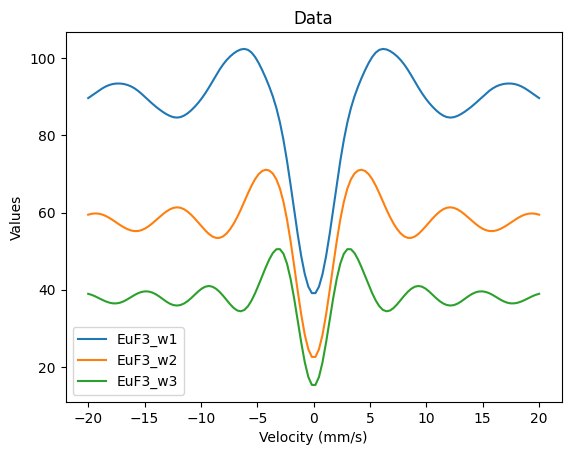

In [ ]:
# 横軸に1列目のデータを使用
x = data.iloc[:, 0]

# 3列目から5列目のデータをそれぞれプロット
for i in range(2, 5):
    plt.plot(x, data.iloc[:, i], label=f'EuF3_w{i-1}')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Data')
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Values')

# グラフを表示
plt.show()

In [ ]:
# AbExist.csvとNoAb.csvを読み込む
abexist_data = pd.read_csv(data_path + '/drive/MyDrive/卒研/AbExist.csv', delimiter=r'\t')
noab_data = pd.read_csv(data_path + '/drive/MyDrive/卒研/NoAb.csv', delimiter=r'\t')

# 列名を修正
abexist_data = abexist_data.rename(columns={'"S8SVel02Scaled': 'S8SVel02Scaled', 'S8SRuma030"': 'S8SRuma030'})

# 余分なダブルクォーテーションを取り除く
abexist_data["S8SVel02Scaled"] = abexist_data["S8SVel02Scaled"].str.replace('"', '').astype(float)
abexist_data["S8SRuma030"] = abexist_data["S8SRuma030"].str.replace('"', '').astype(int)

# 列名を修正
noab_data = noab_data.rename(columns={'"S8SV02Scaled': 'S8SV02Scaled', 'S8SEr005"': 'S8SEr005'})

# NoAb.csvのカラム名の修正
noab_data = noab_data.rename(columns={'"S8SV02Scaled': 'S8SV02Scaled', 'S8SEr005"': 'S8SEr005'})
noab_data["S8SV02Scaled"] = noab_data["S8SV02Scaled"].str.replace('"', '').astype(float)
noab_data["S8SEr005"] = noab_data["S8SEr005"].str.replace('"', '').astype(int)

# 2つのデータフレームを結合
experiment = pd.concat([abexist_data, noab_data], axis=1)

# 各カラムの値を、そのカラムの1行目の値で割る
for col in experiment.columns:
    experiment[col] = experiment[col] / experiment[col].iloc[0]

# S8SVel02Scaled から S8SRuma030 までのカラムを持つデータフレーム
data_abexist = experiment[['S8SVel02Scaled', 'S8SRuma003', 'S8SRuma006',  'S8SRuma009',
                     'S8SRuma012', 'S8SRuma015', 'S8SRuma018', 'S8SRuma021',
                        'S8SRuma024', 'S8SRuma027', 'S8SRuma030']]

# S8SV02Scaled から S8SEr005 までのカラムを持つデータフレーム
data_noab = experiment[['S8SV02Scaled','S8SEr003', 'S8SEr004', 'S8SEr005']]

data_abexist["S8SVel02Scaled"] = data_abexist["S8SVel02Scaled"] * -1
data_noab["S8SV02Scaled"] = data_noab["S8SV02Scaled"] * -1

# 組み合わせる
testdata = pd.concat([data_abexist, data_noab], axis=1)
testdata.drop('S8SVel02Scaled', axis=1, inplace=True)
testdata.drop('S8SV02Scaled', axis=1, inplace=True)

<ipython-input-193-66315d45d666>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  abexist_data = pd.read_csv(data_path + '/drive/MyDrive/卒研/AbExist.csv', delimiter=r'\t')
<ipython-input-193-66315d45d666>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  noab_data = pd.read_csv(data_path + '/drive/MyDrive/卒研/NoAb.csv', delimiter=r'\t')
<ipython-input-193-66315d45d666>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
from sklearn.impute import SimpleImputer
# 欠損値保管
# Creating an imputer object that replaces NaN values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Applying the imputer only to the 'S8SEr003' column
testdata['S8SEr003'] = imputer.fit_transform(testdata[['S8SEr003']])

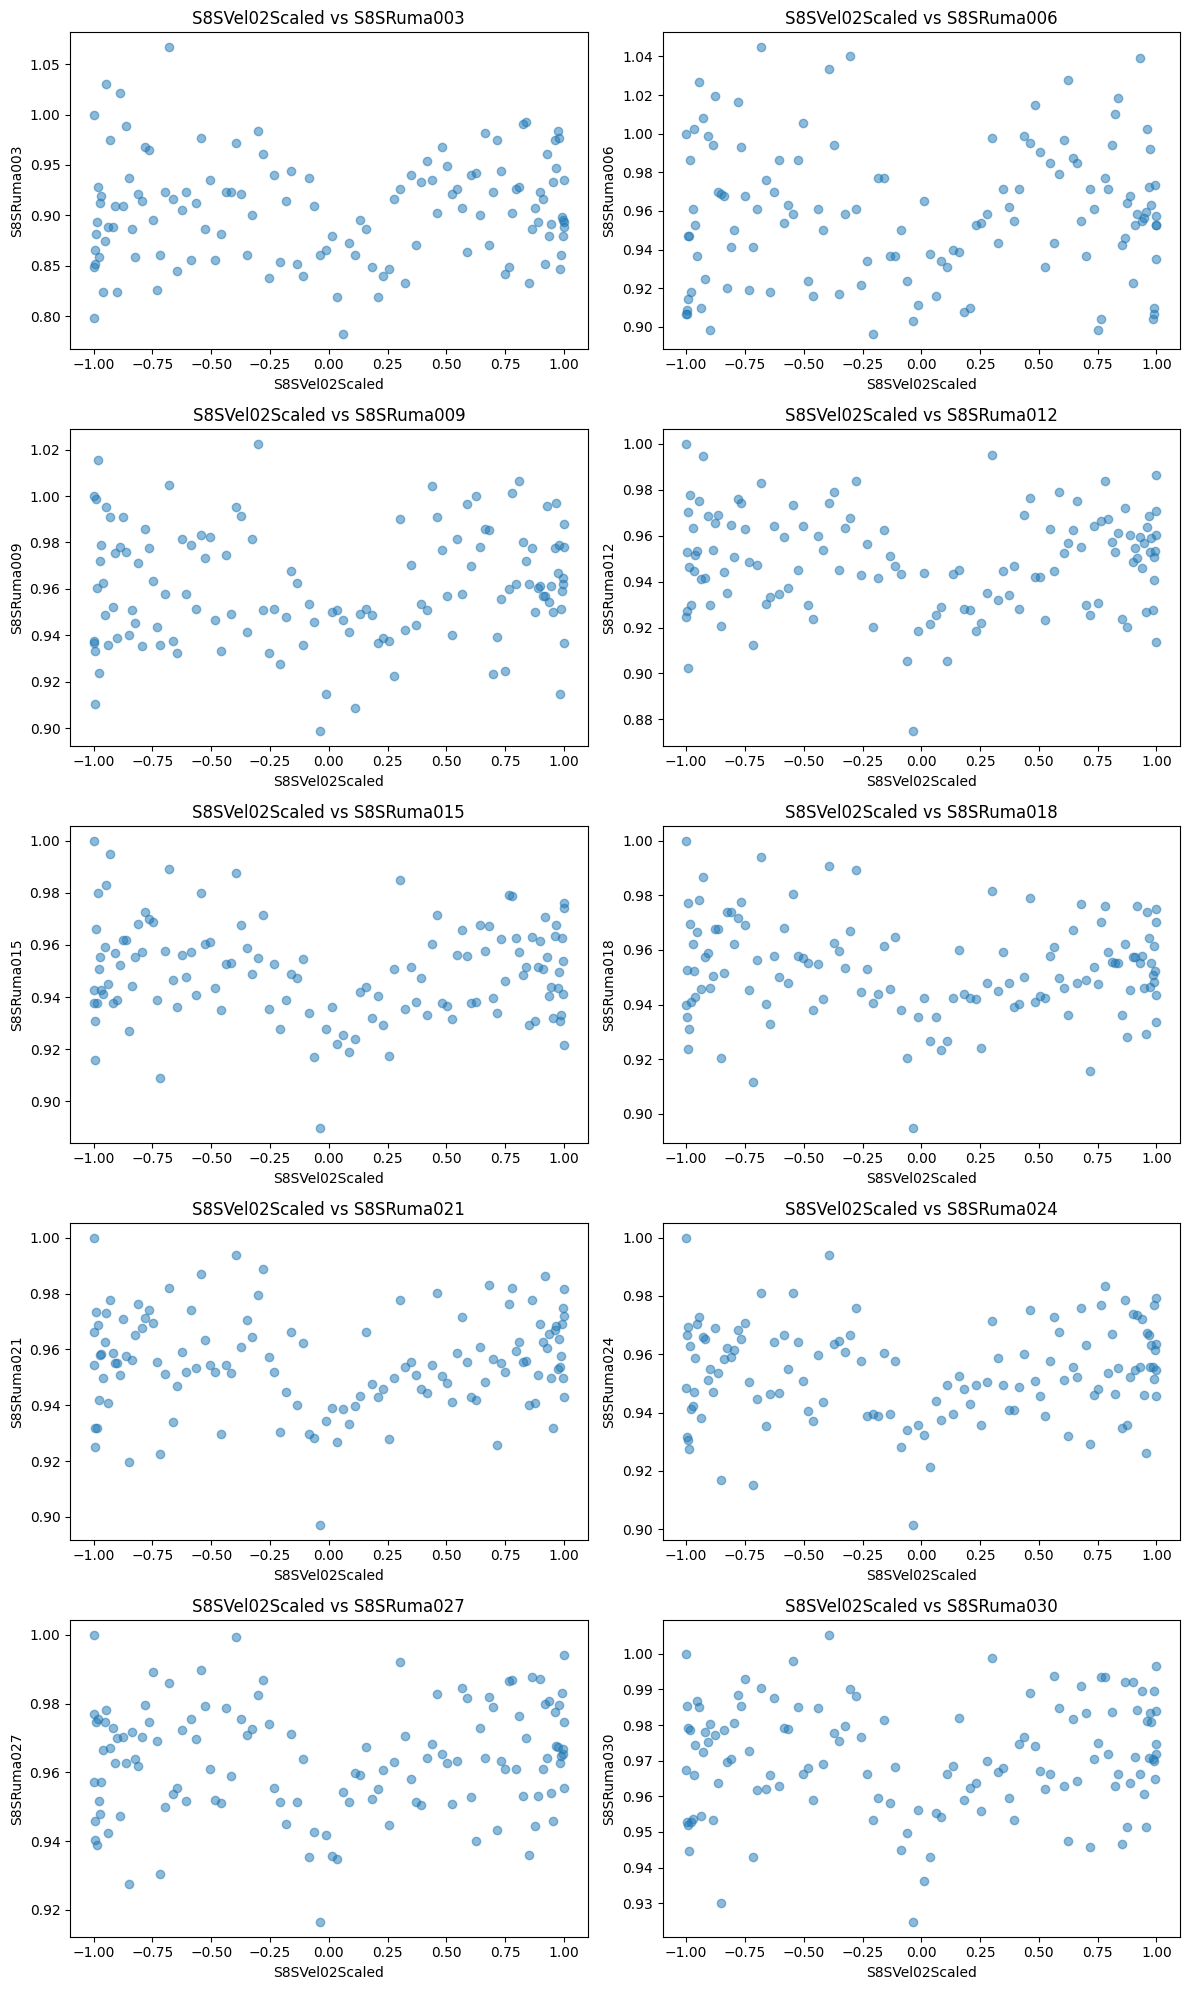

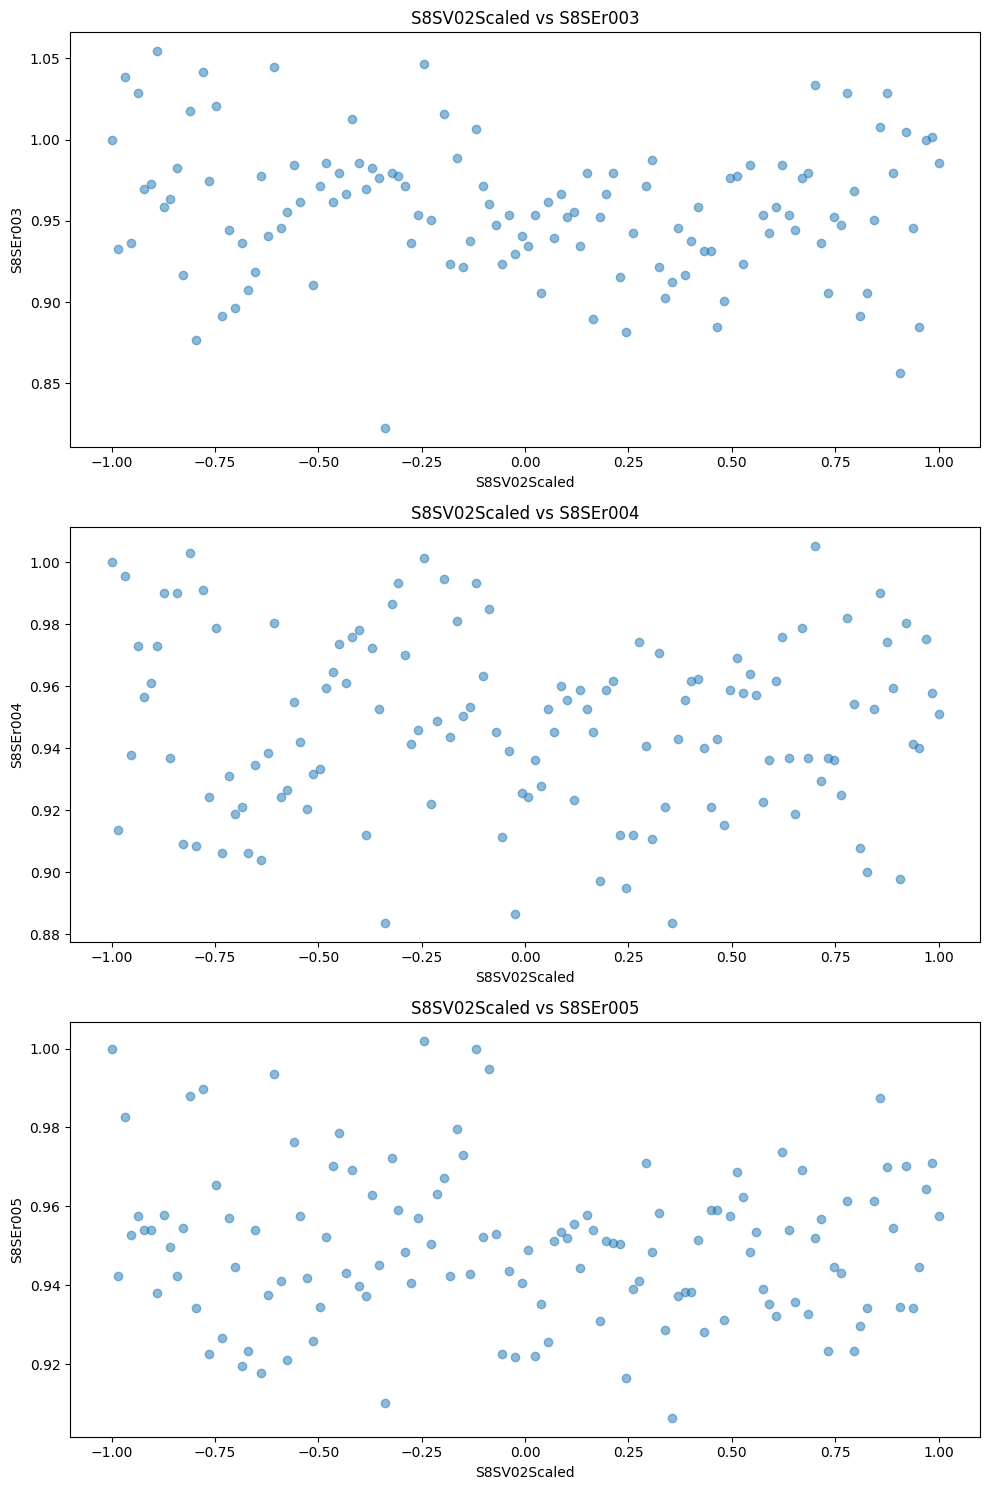

In [ ]:
# data_abexistの散布図
fig1, axes1 = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

x_data_abexist = data_abexist["S8SVel02Scaled"]
for idx, col in enumerate(data_abexist.columns[1:]):
    ax = axes1[idx // 2, idx % 2]
    ax.scatter(x_data_abexist, data_abexist[col], alpha=0.5)
    ax.set_title(f'S8SVel02Scaled vs {col}')
    ax.set_xlabel('S8SVel02Scaled')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# data_noabの散布図
fig2, axes2 = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

x_data_noab = data_noab["S8SV02Scaled"]
for idx, col in enumerate(data_noab.columns[1:]):
    axes2[idx].scatter(x_data_noab, data_noab[col], alpha=0.5)
    axes2[idx].set_title(f'S8SV02Scaled vs {col}')
    axes2[idx].set_xlabel('S8SV02Scaled')
    axes2[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

# ピークとの比率が0.9になるよう設定
実験データのピークが0.9なのでそれに合わせる

足す値$a$は
$$
a = 10 (最左値 - 最小値)
$$

In [ ]:
# 新しいデータフレームを作成
new_dataframe = pd.DataFrame()

# 最初のカラム（速度）をそのままコピー
new_dataframe[data.columns[0]] = data.iloc[:, 0]

# 2つ目以降のカラムに対して計算を行う
for column in data.columns[1:]:
    first_row_value = data[column].iloc[0]
    min_value = data[column].min()
    new_dataframe[column] = data[column] + (first_row_value - min_value) * 10

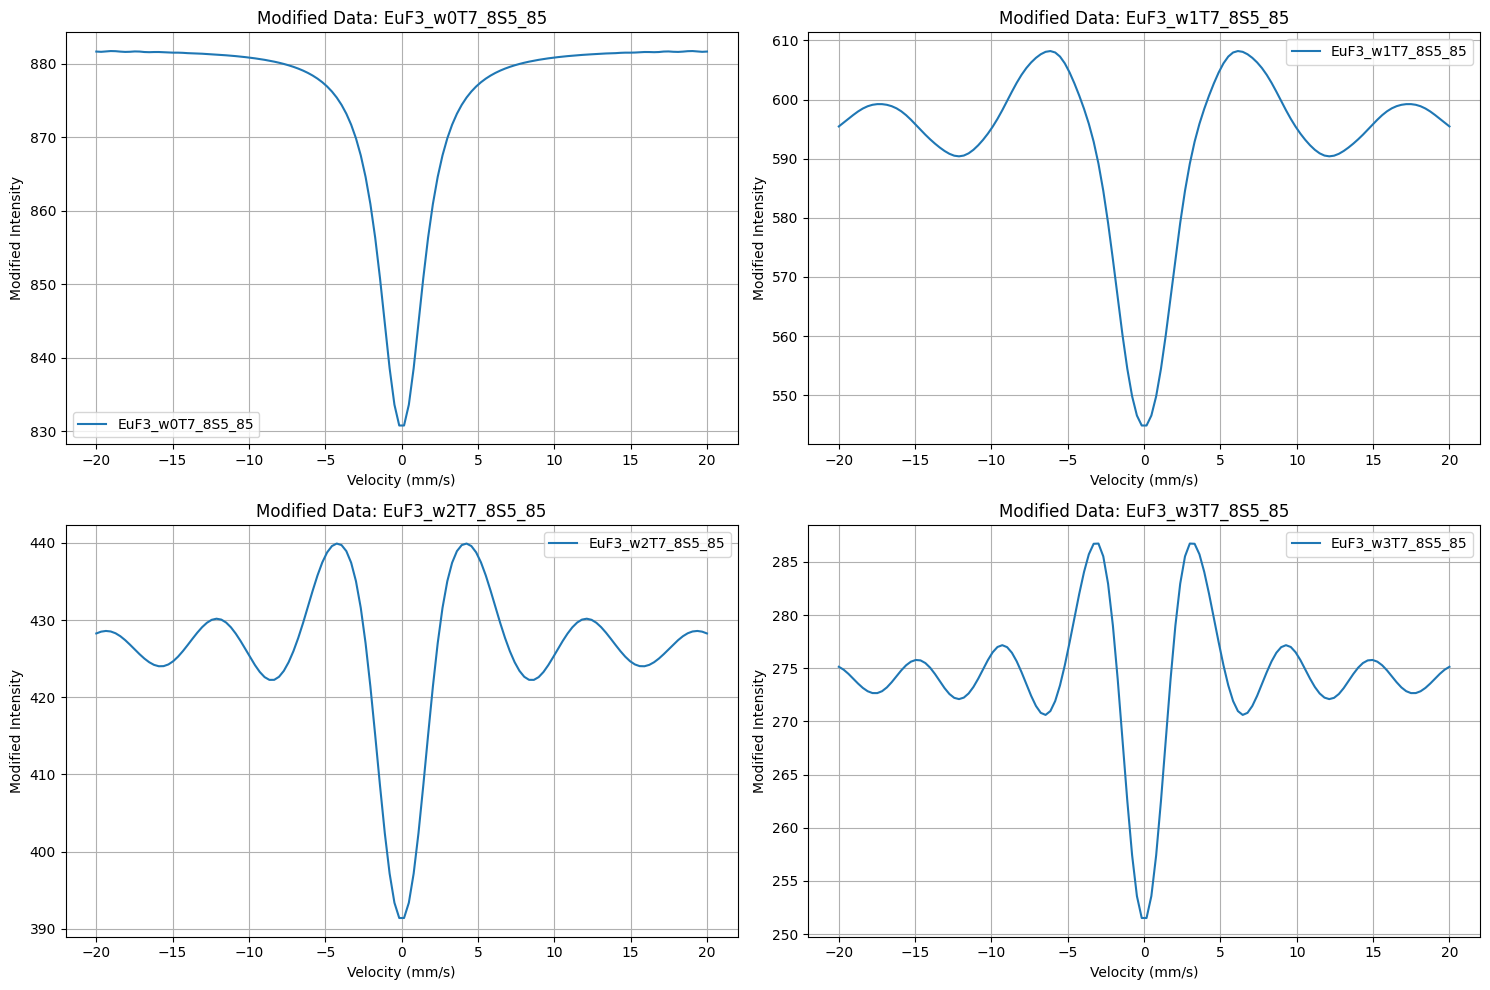

In [ ]:
import matplotlib.pyplot as plt

# データフレームのプロット
plt.figure(figsize=(15, 10))

# 最初のカラム（おそらく速度）をx軸に使用
x = new_dataframe.iloc[:, 0]

# 2つ目以降の各カラムを2行2列のサブプロットとして表示
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.plot(x, new_dataframe.iloc[:, i], label=new_dataframe.columns[i])
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Modified Intensity')
    plt.title(f'Modified Data: {new_dataframe.columns[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_dataframe = pd.DataFrame()

# 最初のカラム（速度）をそのままコピー
test_dataframe[data.columns[0]] = new_dataframe.iloc[:, 0]
# 2つ目以降のカラムに対して計算を行う
for column in data.columns[1:]:
    first_row_value = new_dataframe[column].iloc[0]
    test_dataframe[column] = new_dataframe[column] / first_row_value

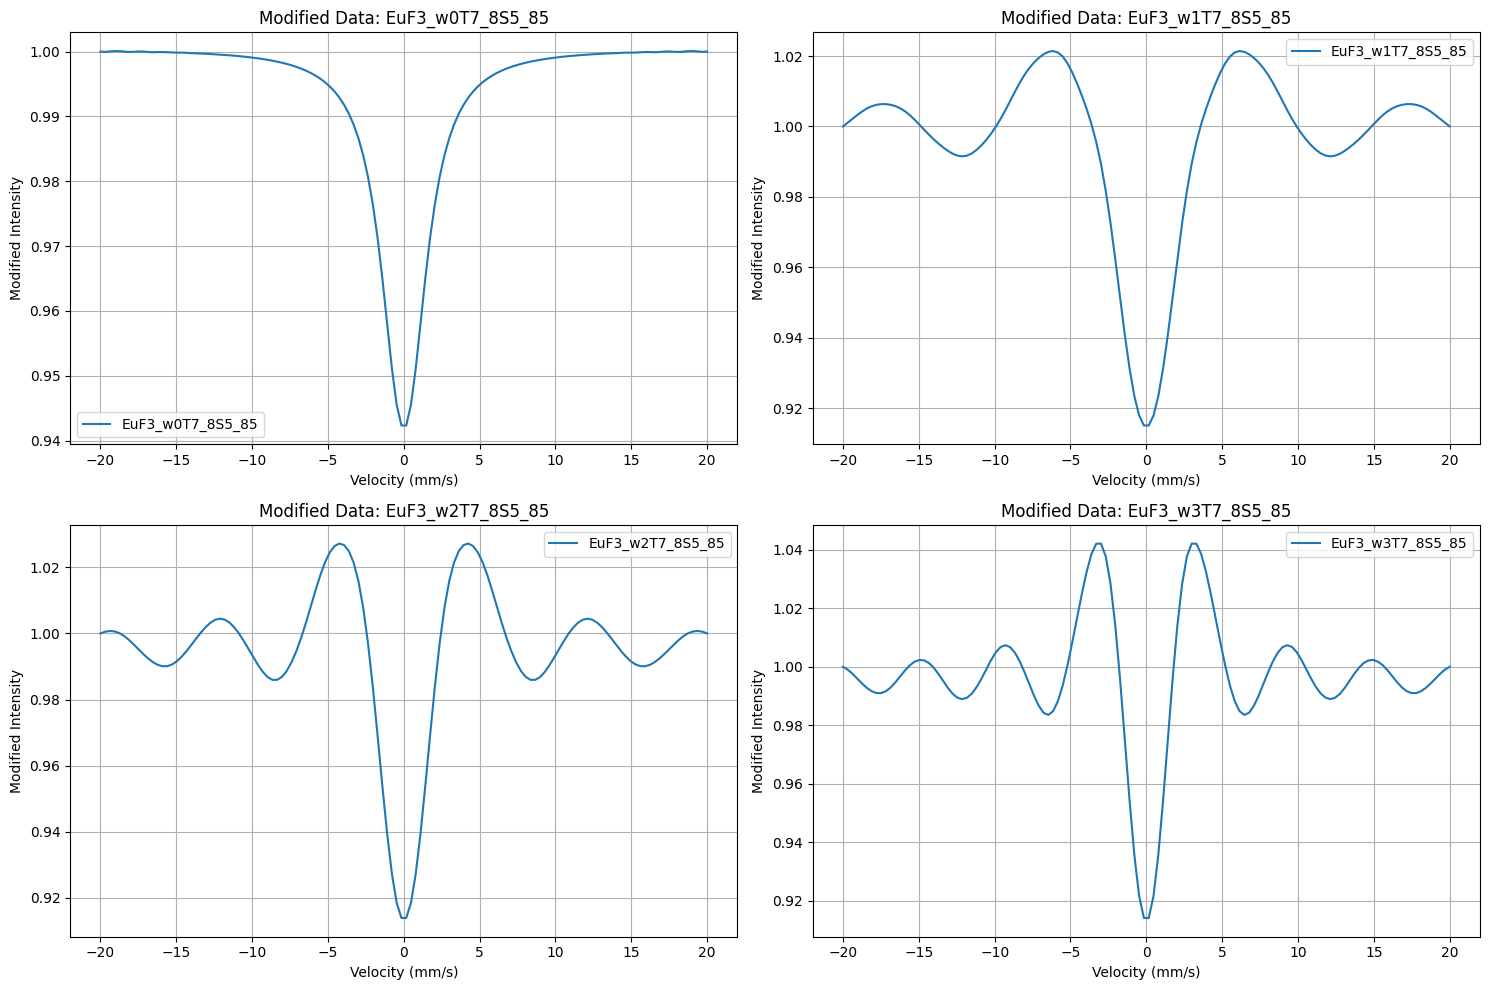

In [ ]:
import matplotlib.pyplot as plt

# データフレームのプロット
plt.figure(figsize=(15, 10))

# 最初のカラム（おそらく速度）をx軸に使用
x = test_dataframe.iloc[:, 0]

# 2つ目以降の各カラムを2行2列のサブプロットとして表示
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.plot(x, test_dataframe.iloc[:, i], label=test_dataframe.columns[i])
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Modified Intensity')
    plt.title(f'Modified Data: {test_dataframe.columns[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# データ数の設定
number = 30
random_number = 30
# 0行目のデータを取得
row_at_zero_index = new_dataframe.iloc[0]

# EuF3_w1

In [ ]:
# 空のデータフレームを作成
dataset_w1 = pd.DataFrame()

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 10)
    column_name = f'w1_noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = new_dataframe['EuF3_w1T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w1[column_name] = new_dataframe['EuF3_w1T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 10)
    column_name = f'w1_random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w1T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w1T7_8S5_85']), size=new_dataframe['EuF3_w1T7_8S5_85'].shape)
    dataset_w1[column_name] = noise

# 教師信号を作成
y_1 = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w1.insert(0, "Velocity (mm/s)", new_dataframe["Velocity (mm/s)"])

In [ ]:
dataset_w1.head()

,Velocity (mm/s),w1_noisy_0,w1_noisy_1,w1_noisy_2,w1_noisy_3,w1_noisy_4,w1_noisy_5,w1_noisy_6,w1_noisy_7,w1_noisy_8,...,w1_random_noise_20,w1_random_noise_21,w1_random_noise_22,w1_random_noise_23,w1_random_noise_24,w1_random_noise_25,w1_random_noise_26,w1_random_noise_27,w1_random_noise_28,w1_random_noise_29
0,-20.000000,627.946942,638.143729,606.995437,578.069975,633.309327,587.832260,598.575869,602.195093,597.391881,...,572.960693,584.924355,595.152911,543.258490,622.303667,575.110653,629.997383,622.991782,572.406639,617.793805
1,-19.685039,613.551431,589.103510,579.451004,614.491097,598.021277,604.371563,558.770411,550.807375,649.561556,...,581.146399,606.175282,582.579686,622.590104,547.073760,582.224885,568.970604,598.972243,600.332683,580.726092
2,-19.370079,558.990845,584.905256,602.664750,595.655228,600.992316,592.933781,582.220515,611.983213,593.447176,...,623.857488,595.422884,588.435898,596.327301,567.385379,574.463793,580.414576,568.239224,557.866095,623.815908
3,-19.055118,597.182759,532.536547,555.819117,608.430651,595.619658,585.123173,599.008888,625.380817,601.310976,...,565.153227,621.347109,622.866801,580.076616,648.965043,583.208877,576.983467,625.493573,615.903503,580.778357
4,-18.740157,613.176873,597.780326,616.400037,630.875615,548.969668,603.743445,567.770509,623.346050,608.808512,...,547.010247,600.416166,560.748680,595.454539,549.055010,620.181740,603.922306,591.679719,605.087211,556.471958


In [ ]:
# 各カラムの値を、そのカラムの1行目の値で割る
for col in dataset_w1.columns:
    dataset_w1[col] = dataset_w1[col] / row_at_zero_index['EuF3_w1T7_8S5_85']

dataset_w1.head()

,Velocity (mm/s),w1_noisy_0,w1_noisy_1,w1_noisy_2,w1_noisy_3,w1_noisy_4,w1_noisy_5,w1_noisy_6,w1_noisy_7,w1_noisy_8,...,w1_random_noise_20,w1_random_noise_21,w1_random_noise_22,w1_random_noise_23,w1_random_noise_24,w1_random_noise_25,w1_random_noise_26,w1_random_noise_27,w1_random_noise_28,w1_random_noise_29
0,-0.033588,1.054569,1.071693,1.019383,0.970806,1.063574,0.987201,1.005243,1.011321,1.003255,...,0.962225,0.982317,0.999495,0.912344,1.045092,0.965836,1.058012,1.046247,0.961295,1.037518
1,-0.033059,1.030393,0.989336,0.973125,1.031971,1.004312,1.014977,0.938394,0.925021,1.090868,...,0.975972,1.018006,0.978380,1.045573,0.918751,0.977784,0.955525,1.005909,1.008194,0.975267
2,-0.032530,0.938765,0.982285,1.012110,1.000338,1.009302,0.995768,0.977776,1.027760,0.996630,...,1.047701,0.999948,0.988214,1.001467,0.952862,0.964750,0.974743,0.954296,0.936876,1.047631
3,-0.032001,1.002904,0.894337,0.933438,1.021793,1.000279,0.982651,1.005971,1.050259,1.009837,...,0.949114,1.043485,1.046037,0.974176,1.089867,0.979436,0.968981,1.050449,1.034343,0.975354
4,-0.031472,1.029764,1.003907,1.035177,1.059487,0.921935,1.013922,0.953509,1.046842,1.022428,...,0.918645,1.008334,0.941717,1.000001,0.922078,1.041528,1.014222,0.993662,1.016178,0.934534


In [ ]:
dataset_w1.to_csv(data_path + '/drive/MyDrive/卒研/dataset_w1.csv', index=False)

# EuF3_w2

In [ ]:
# 空のデータフレームを作成
dataset_w2 = pd.DataFrame()

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 20)
    column_name = f'w2_noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = new_dataframe['EuF3_w2T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w2[column_name] = new_dataframe['EuF3_w2T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 20)
    column_name = f'w2_random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w2T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w2T7_8S5_85']), size=new_dataframe['EuF3_w2T7_8S5_85'].shape)
    dataset_w2[column_name] = noise

# 教師信号を作成
y_2 = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w2.insert(0, "Velocity (mm/s)", new_dataframe["Velocity (mm/s)"])

In [ ]:
# 各カラムの値を、そのカラムの1行目の値で割る
for col in dataset_w2.columns:
    dataset_w2[col] = dataset_w2[col] / row_at_zero_index['EuF3_w2T7_8S5_85']

dataset_w2.head()

,Velocity (mm/s),w2_noisy_0,w2_noisy_1,w2_noisy_2,w2_noisy_3,w2_noisy_4,w2_noisy_5,w2_noisy_6,w2_noisy_7,w2_noisy_8,...,w2_random_noise_20,w2_random_noise_21,w2_random_noise_22,w2_random_noise_23,w2_random_noise_24,w2_random_noise_25,w2_random_noise_26,w2_random_noise_27,w2_random_noise_28,w2_random_noise_29
0,-0.046700,1.042711,0.997489,0.995557,1.032230,1.064230,1.011031,1.009471,1.062123,1.021568,...,1.041122,0.979193,1.015393,1.027873,1.029396,0.965716,1.045437,1.010846,1.005897,0.839748
1,-0.045964,1.010011,0.995170,0.929813,1.001792,0.963325,1.050179,0.906715,0.985872,1.081221,...,1.008589,0.942307,0.967163,1.102979,0.969235,1.005446,0.973054,1.031966,0.985275,1.003353
2,-0.045229,1.018040,1.051117,1.053050,0.963166,0.985467,0.960171,1.035261,1.030682,0.987981,...,0.958780,0.978531,0.893287,1.117916,0.980242,1.023051,0.948801,0.971985,1.027929,0.942473
3,-0.044493,0.887333,0.939851,0.989029,1.046450,0.952705,0.972022,1.032603,1.019738,0.953816,...,0.978550,1.023649,1.028521,1.012724,1.041196,1.093550,0.972377,1.019706,1.027797,1.000128
4,-0.043758,0.947634,1.036076,0.976324,1.033963,0.948311,0.953817,0.988997,1.010852,1.002917,...,0.990194,0.978180,1.080928,0.927705,1.035639,1.021765,1.005223,1.022541,0.997063,0.973790


In [ ]:
dataset_w2.to_csv(data_path + '/drive/MyDrive/卒研/dataset_w2.csv', index=False)

# EuF3_w3

In [ ]:
# 空のデータフレームを作成
dataset_w3 = pd.DataFrame()

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 30)
    column_name = f'w3_noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = new_dataframe['EuF3_w3T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w3[column_name] = new_dataframe['EuF3_w3T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 30)
    column_name = f'w3_random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w3T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w3T7_8S5_85']), size=new_dataframe['EuF3_w3T7_8S5_85'].shape)
    dataset_w3[column_name] = noise

# datasetの最初の列に元データの最初の列を追加
dataset_w3.insert(0, "Velocity (mm/s)", new_dataframe["Velocity (mm/s)"])

In [ ]:
# 各カラムの値を、そのカラムの1行目の値で割る
for col in dataset_w3.columns:
    dataset_w3[col] = dataset_w3[col] / row_at_zero_index['EuF3_w3T7_8S5_85']

dataset_w3.head()

,Velocity (mm/s),w3_noisy_0,w3_noisy_1,w3_noisy_2,w3_noisy_3,w3_noisy_4,w3_noisy_5,w3_noisy_6,w3_noisy_7,w3_noisy_8,...,w3_random_noise_20,w3_random_noise_21,w3_random_noise_22,w3_random_noise_23,w3_random_noise_24,w3_random_noise_25,w3_random_noise_26,w3_random_noise_27,w3_random_noise_28,w3_random_noise_29
0,-0.072690,0.923794,0.974996,0.978966,0.980777,1.014700,0.886074,1.040779,0.996717,1.060812,...,1.114536,0.918016,1.050680,1.051202,0.992066,1.010662,0.964052,1.022449,1.006444,0.897890
1,-0.071545,1.091078,0.978923,1.058286,0.902420,0.953980,0.974089,1.090668,1.039643,0.979540,...,1.012588,0.925522,0.918182,0.932313,0.972241,1.143347,0.963501,1.007712,1.132982,0.999872
2,-0.070401,0.939141,1.002475,1.032572,0.905150,0.903587,0.951466,0.966770,1.018465,1.005284,...,1.053969,1.003613,1.077585,1.068913,1.039968,1.060210,1.027538,1.031784,1.057668,0.974324
3,-0.069256,1.024249,0.948347,1.000167,0.961621,0.968007,0.940339,1.065139,0.917704,1.012771,...,0.928818,0.900247,1.034573,1.040692,0.919840,0.921015,0.962428,0.977647,1.004124,0.984591
4,-0.068111,0.988212,0.981124,1.041005,0.981237,0.973101,0.908808,0.958755,1.085548,1.071736,...,1.016490,1.001427,1.034933,0.971977,0.967286,1.010863,1.041811,1.105529,1.064417,0.981566


In [ ]:
dataset_w3.to_csv(data_path + '/drive/MyDrive/卒研/dataset_w3.csv', index=False)

# データセット作成

In [ ]:
# Function to rename duplicate columns
def rename_duplicates(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

# Read the datasets, excluding 'Velocity (mm/s)' from the second and third datasets
dataset_w1 = pd.read_csv(data_path + '/drive/MyDrive/卒研/dataset_w1.csv')
dataset_w2 = pd.read_csv(data_path + '/drive/MyDrive/卒研/dataset_w2.csv').drop(columns=['Velocity (mm/s)'])
dataset_w3 = pd.read_csv(data_path + '/drive/MyDrive/卒研/dataset_w3.csv').drop(columns=['Velocity (mm/s)'])

# Concatenate the datasets
X = pd.concat([dataset_w1, dataset_w2, dataset_w3], axis=1)

# Rename duplicate columns
X = rename_duplicates(X)

In [ ]:
# 教師信号
pattern = np.array([1]*number + [0]*random_number)
y = np.tile(pattern, 3)

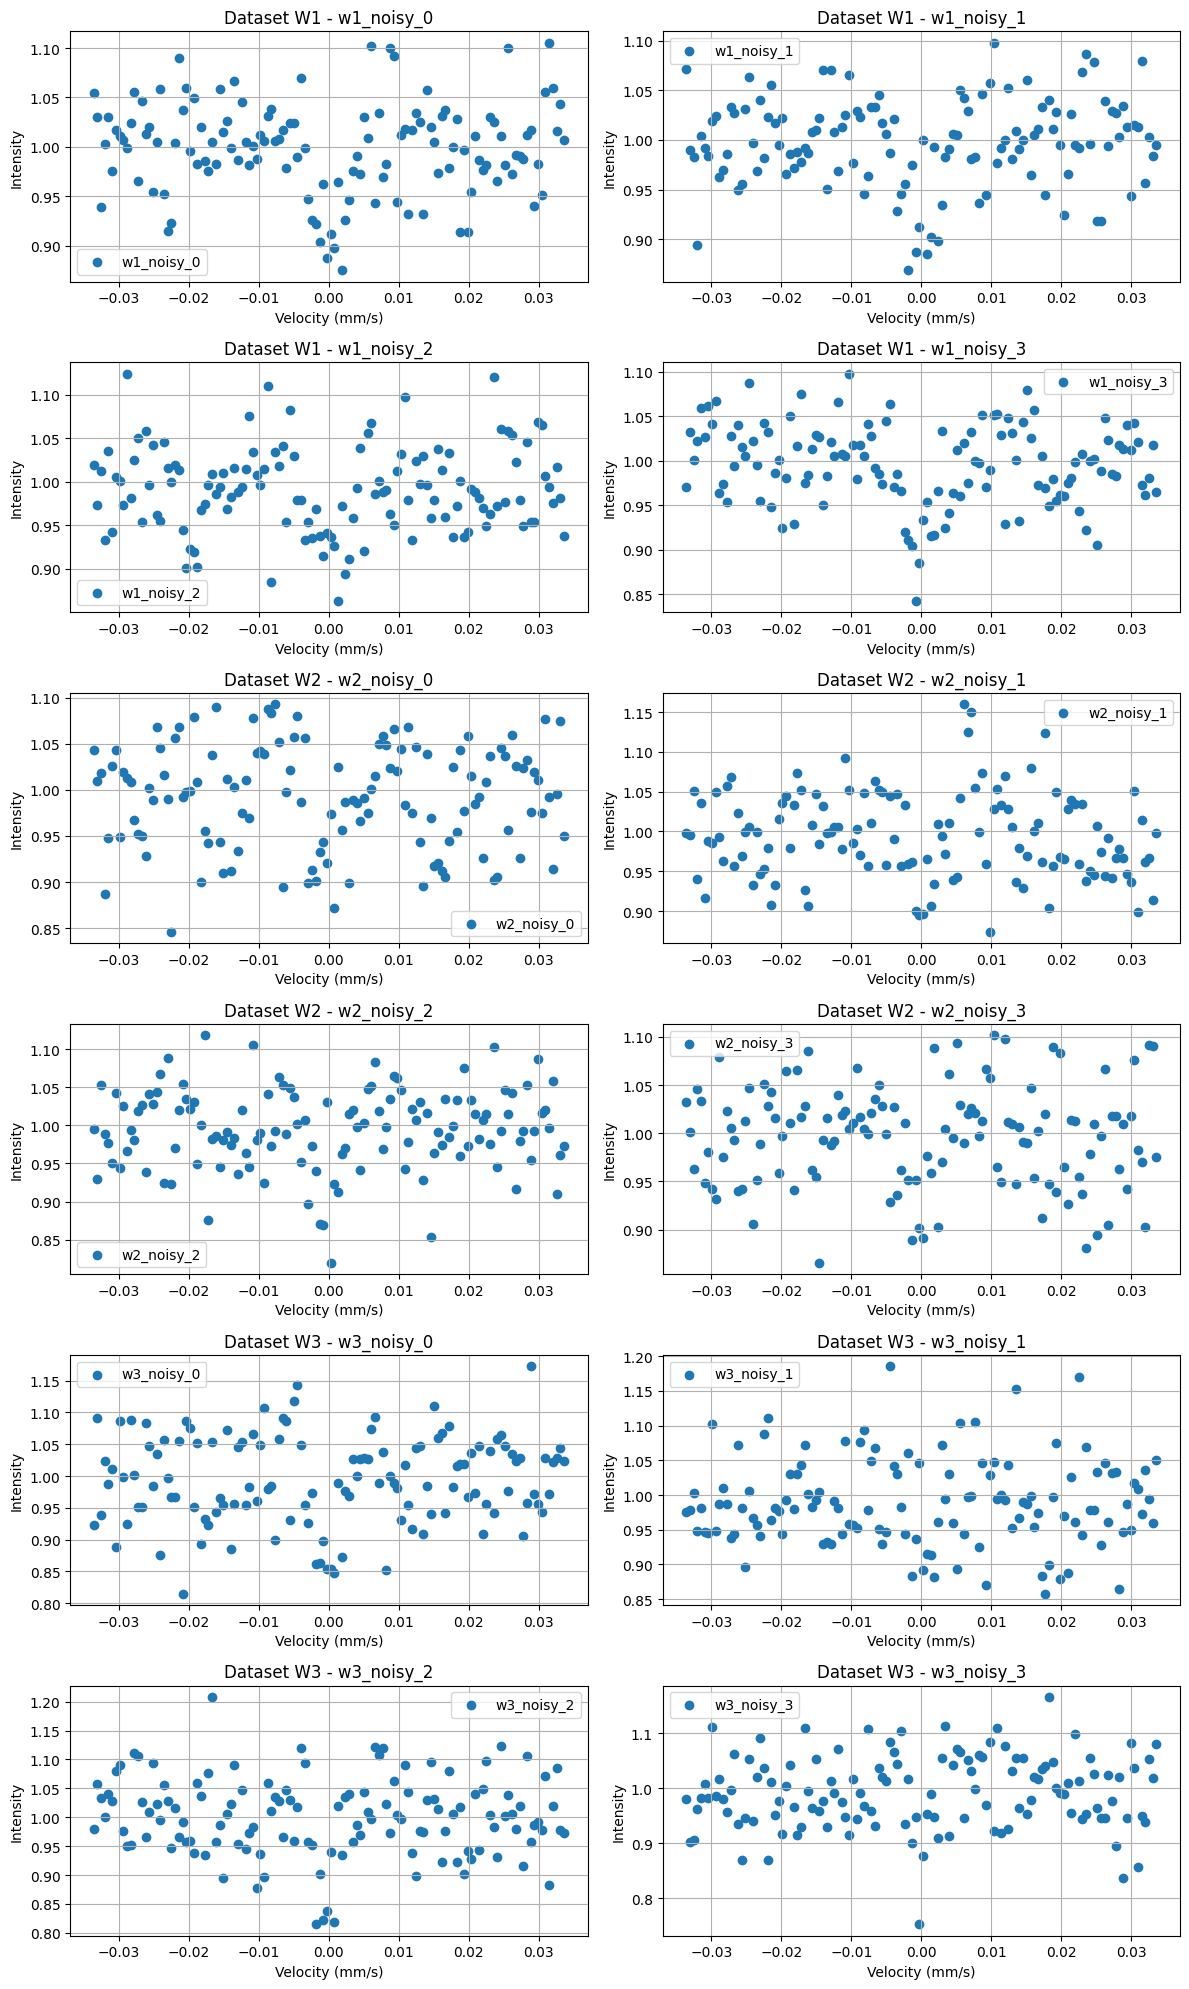

In [ ]:
# 代表を4つずつプロット
# プロットの設定
plt.figure(figsize=(12, 20))

# dataset_w1のプロット
for i, column in enumerate(dataset_w1.columns[1:5], 1):
    plt.subplot(6, 2, i)
    plt.scatter(dataset_w1['Velocity (mm/s)'], dataset_w1[column], label=column)
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Intensity')
    plt.title(f'Dataset W1 - {column}')
    plt.legend()
    plt.grid(True)

# dataset_w2のプロット
for i, column in enumerate(dataset_w2.columns[0:4], 5):
    plt.subplot(6, 2, i)
    plt.scatter(dataset_w1['Velocity (mm/s)'], dataset_w2[column], label=column)
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Intensity')
    plt.title(f'Dataset W2 - {column}')
    plt.legend()
    plt.grid(True)

# dataset_w3のプロット
for i, column in enumerate(dataset_w3.columns[0:4], 9):
    plt.subplot(6, 2, i)
    plt.scatter(dataset_w1['Velocity (mm/s)'], dataset_w3[column], label=column)
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Intensity')
    plt.title(f'Dataset W3 - {column}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# ロジスティック回帰

In [ ]:
# 入力データとして、各カラムを1つのサンプルとする
X_train = X.drop('Velocity (mm/s)', axis=1)
X_train = X_train.T
y_train = y

X_test = testdata.T
y_test = [1]*10 + [0]*3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      1.00      0.87        10

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13



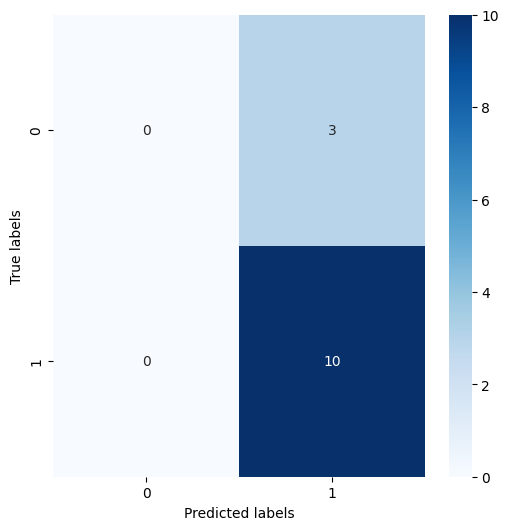

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# ニューラルネットワーク

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLPClassifierのインスタンス化
clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=111,
    solver='adam',
    alpha=0.1,
)

# モデルの訓練
clf.fit(X_train, y_train)

# テストデータでの予測
y_pred = clf.predict(X_test)

# 正確さの計算
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.23



Classification Report:
              precision    recall  f1-score   support

           0       0.23      1.00      0.38         3
           1       0.00      0.00      0.00        10

    accuracy                           0.23        13
   macro avg       0.12      0.50      0.19        13
weighted avg       0.05      0.23      0.09        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


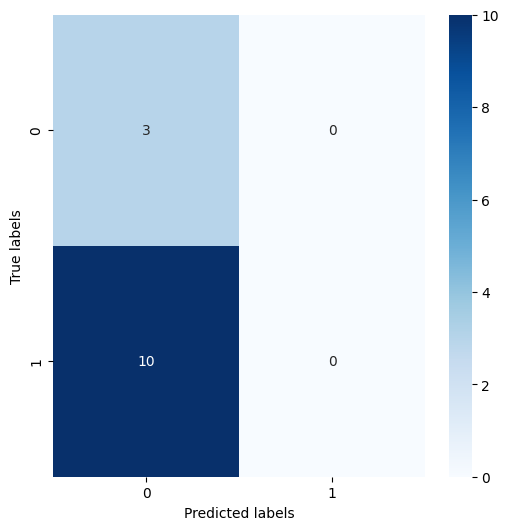

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 分類レポートの表示
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()